<a href="https://colab.research.google.com/github/chandrabhraman/lro-analysis/blob/main/Lunar_Reconnaisance_Orbiter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependency SpiceyPy

In [1]:
!pip install spiceypy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.2 MB/s eta 0:00:00


In [79]:
# Spice Kernels required reading: https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/req/kernel.html
# Spice NAIF IDs: https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/req/naif_ids.html

# Get the required Kernels

In [27]:
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/spk/de421.bsp -nv # Ephemeris DE421
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/spk/lrorg_2009169_2010001_v01.bsp -nv 
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/lsk/naif0009.tls -nv
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/lsk/naif0010.tls -nv
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/ik/lro_lroc_v13.ti -nv # LROC instrument kernel
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/ck/lrosa_2009170_2009172_v01.bc -nv # solar array kernel 
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/ck/lrosa_2009172_2009182_v01.bc -nv # solar array kernel 
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/ck/lrosa_2009182_2009192_v01.bc -nv # solar array kernel 
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/ck/lrosa_2009192_2009202_v01.bc -nv # solar array kernel 
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/ck/lrosc_2009170_2009172_v01.bc -nv # spacecraft ck
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/ck/lrosc_2009172_2009182_v01.bc -nv # spacecraft ck
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/ck/lrosc_2009182_2009192_v01.bc -nv # spacecraft ck
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/ck/lrosc_2009192_2009202_v01.bc -nv # spacecraft ck
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/fk/lro_frames_2010214_v01.tf -nv  # frame kernel
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/sclk/lro_clkcor_2009365_v00.tsc -nv # 2009 sclk
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/pck/pck00008.tpc -nv # pck file
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/pck/pck00010.tpc -nv # pck file

2023-01-22 08:27:29 URL:https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/spk/de421.bsp [16791552/16791552] -> "de421.bsp.1" [1]
2023-01-22 08:27:30 URL:https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/spk/lrorg_2009169_2010001_v01.bsp [15882240/15882240] -> "lrorg_2009169_2010001_v01.bsp.1" [1]
2023-01-22 08:27:31 URL:https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/lsk/naif0009.tls [6342/6342] -> "naif0009.tls.1" [1]
2023-01-22 08:27:31 URL:https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/lsk/naif0010.tls [6529/6529] -> "naif0010.tls.1" [1]
2023-01-22 08:27:32 URL:https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/ik/lro_lroc_v13.ti [25166/25166] -> "lro_lroc_v13.ti.1" [1]
2023-01-22 08:27:34 URL:https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/ck/lrosa_2009170_2009172_v01.bc [55387136/55387136] -> "lrosa_2009

In [44]:
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/sclk/lro_clkcor_2009365_v00.tsc -nv # 2009 sclk
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/pck/pck00008.tpc -nv # pck file
!wget https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/pck/pck00010.tpc -nv # pck file

2023-01-22 09:45:13 URL:https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/sclk/lro_clkcor_2009365_v00.tsc [86282/86282] -> "lro_clkcor_2009365_v00.tsc.1" [1]
2023-01-22 09:45:14 URL:https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/pck/pck00008.tpc [113399/113399] -> "pck00008.tpc" [1]
2023-01-22 09:45:15 URL:https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/pck/pck00010.tpc [127911/127911] -> "pck00010.tpc" [1]


# Save Meta Kernel 

In [48]:
with open('LROMetaK.txt', 'w') as f:
    line1 = "\{}".format("b") + "egindata \n"
    line2 = "KERNELS_TO_LOAD=( \n"
    line3 = "'/content/de421.bsp', \n"
    line4 = "'/content/lrorg_2009169_2010001_v01.bsp', \n"
    line5 = "'/content/naif0009.tls', \n"
    line6 = "'/content/naif0010.tls', \n"
    line7 = "'/content/lro_lroc_v13.ti', \n"
    line8 = "'/content/lrosa_2009170_2009172_v01.bc', \n"
    line9 = "'/content/lrosa_2009172_2009182_v01.bc', \n"
    line10 = "'/content/lrosa_2009182_2009192_v01.bc', \n"
    line11 = "'/content/lrosa_2009192_2009202_v01.bc', \n"
    line12 = "'/content/lrosc_2009170_2009172_v01.bc', \n"
    line13 = "'/content/lrosc_2009172_2009182_v01.bc', \n"
    line14 = "'/content/lrosc_2009182_2009192_v01.bc', \n"
    line15 = "'/content/lrosc_2009192_2009202_v01.bc', \n"
    line16 = "'/content/lro_frames_2010214_v01.tf', \n"
    line17 = "'/content/lro_clkcor_2009365_v00.tsc', \n"
    line18 = "'/content/pck00008.tpc', \n"
    line19 = "'/content/pck00010.tpc' \n"
    line20 = ") \n"
    line21 = "\{}".format("b") + "egintext"
  
    f.writelines([line1, line2, line3, line4, line5, line6, line7, line8, line9, line10, line11, line12, line13, line14, line15, line16, line17, line18, line19, line20, line21])
  
print("New metakernel text file created successfully!")

New metakernel text file created successfully!


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import spiceypy as spice

In [30]:
# Print out the toolkit version
spice.tkvrsn("TOOLKIT")

'CSPICE_N0067'

In [31]:
# Spiceypy function reference: https://spiceypy.readthedocs.io/en/v2.3.1/documentation.html

# Load Meta Kernel

In [49]:
spice.furnsh("/content/LROMetaK.txt")

# Define time period for analysis

In [18]:
'''
  Reference:
    - https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/info/mostused.html
'''

step = 300 #(1*365+0)*24

# Reference for mapping day of year to date: https://www.esrl.noaa.gov/gmd/grad/neubrew/Calendar.jsp?view=DOY&year=2009&col=4

# we are going to get positions between these two dates
utc = ['Jun 30, 2009', 'Jul 30, 2009']

# get et values one and two, we could vectorize str2et
etOne = spice.str2et(utc[0])
etTwo = spice.str2et(utc[1])

print("ET One: {}, ET Two: {}".format(etOne, etTwo))

# get times
times = [x*(etTwo-etOne)/step + etOne for x in range(step)]

# check first few times:
#print(times[0:3])

ET One: 299592066.1841393, ET Two: 302184066.1833191


# Get position history

In [19]:
positions, lightTimes = spice.spkpos('LRO', times, 'J2000', 'NONE','MOON')

# Plot positions

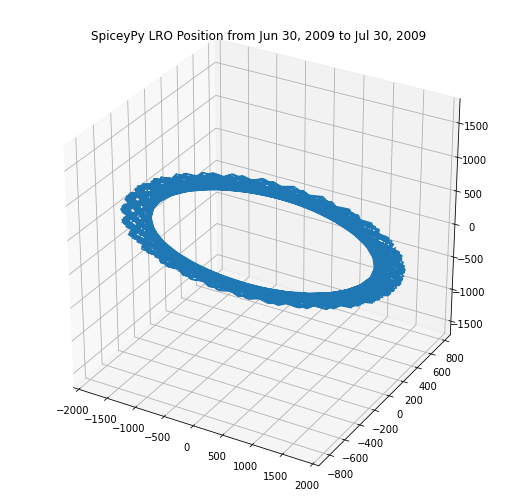

In [20]:
positions = positions.T # positions is shaped (N, 3), let's transpose to (3, N) 
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[0], positions[1], positions[2])
plt.title('SpiceyPy LRO Position (km) from {} to {}'.format(utc[0],utc[1]))
plt.show()

# Sun Pointing Analysis

In [171]:
# Sun Pointing Analysis
step = 1500 

# we are going to get positions between these two dates
#utc_spa = ['Jun 30, 2009', 'Jul 20, 2009']
utc_spa = ['Jul 12, 2009', 'Jul 13, 2009']

# get et values one and two, we could vectorize str2et
etOne_spa, etTwo_spa = spice.str2et(utc_spa[0]), spice.str2et(utc_spa[1])

# get times
times_spa = [x*(etTwo_spa-etOne_spa)/step + etOne_spa for x in range(step)]

In [180]:
# Instrument reference: https://naif.jpl.nasa.gov/pub/naif/pds/data/lro-l-spice-6-v1.0/lrosp_1000/data/fk/lro_frames_2010214_v01.tf

[pos, ltime] = spice.spkpos('SUN', times_spa,'LRO_SA','LT+S','LRO') # Sun position in Solar array frame
#[pos, ltime] = spice.spkpos('SUN', times_spa,'LRO_SC_BUS','LT+S','LRO') # Sun position in Spacecraft bus frame

# Non dimensionalize
pos= pos / np.linalg.norm(pos, axis=1, keepdims=True)

# Solar array normal estimate (mean position tracking)
sa_normal = [np.mean(pos[:,0]),np.mean(pos[:,1]),np.mean(pos[:,2])]
sa_normal = sa_normal / np.linalg.norm(sa_normal)

# Compute the angular separation
sep =  [spice.convrt(spice.vsep(sa_normal, pos[x,:]),'RADIANS', 'DEGREES') for x in range(pos.shape[0])]

# Attitude and rate function reference: https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/ckgpav_c.html
#positions, lightTimes =spice.ckgpav(inst, sclkdp, tol, ref)

<function matplotlib.pyplot.show(*args, **kw)>

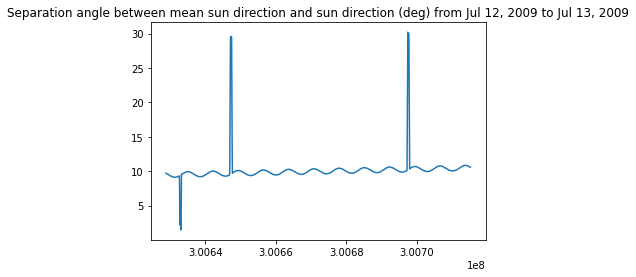

In [185]:
plt.plot(times_spa,sep)
plt.title('Separation angle between mean sun direction and sun direction (deg) from {} to {}'.format(utc_spa[0],utc_spa[1]))
plt.show

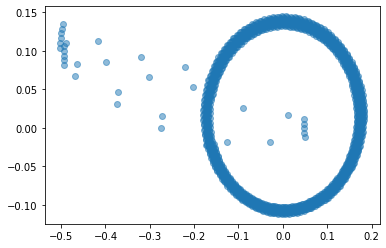

In [183]:
plt.scatter(pos[:,0]-sa_normal[0], pos[:,1]-sa_normal[1],alpha=0.5)
plt.show()

In [179]:
posnew=pos / np.linalg.norm(pos, axis=1, keepdims=True)
posnew[0]

array([ 0.15457092, -0.65737571, -0.73753983])